<a href="https://colab.research.google.com/github/drpetros11111/transformers-with-python/blob/main/00_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Data

We will be using the [Rotten Tomatoes movie reviews dataset](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data).

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import os

api = KaggleApi()
api.authenticate()

for file in ['train.tsv', 'test.tsv']:
    api.competition_download_file('sentiment-analysis-on-movie-reviews', f'{file}.zip', path='./')

    with zipfile.ZipFile(f'{file}.zip', 'r') as zip_ref:
        zip_ref.extractall('./')

    os.remove(f'{file}.zip')

100%|█████████████████████████████████████████████████████████████████████████████| 1.28M/1.28M [00:00<00:00, 6.49MB/s]


100%|███████████████████████████████████████████████████████████████████████████████| 494k/494k [00:00<00:00, 4.53MB/s]

---

## Preparing Data

We will start by reading the data into a Pandas Dataframe using th `read_csv` function. Because we're working with *.tsv* (*tab seperate values*) files we need to specify that we will be taking tab characters as the delimiters:

In [ ]:
import pandas as pd

df = pd.read_csv('train.tsv', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


The *Phrase* column contains all of our text data that we will be processing. We can also see that there are many copies through *segments* of the same answer (note that the *SentenceId* value for each of these copies is identical). We can reduce the amount of noise in our dataset by removing these duplicates.

In [ ]:
#df = df.drop_duplicates(subset=['SentenceId'], keep='first')

df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


Let's check the distribution of sentiment classes across our data.

<AxesSubplot:>

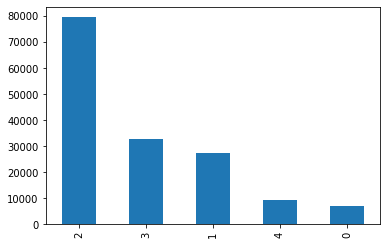

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')

# Sentiment Graph
Certainly, let's break down the code df['Sentiment'].value_counts().plot(kind='bar') step-by-step within the context of your Colab notebook.

----------------------------------------
#Explanation

This line of code is designed to visualize the distribution of sentiment classes in your dataset using a bar chart. Here's what each part does:

    df['Sentiment']

This part selects the 'Sentiment' column from your Pandas DataFrame (df).

In your dataset, the 'Sentiment' column contains the sentiment labels for each movie review phrase, ranging from 0 to 4.

    .value_counts():

This is a Pandas Series method that calculates the frequency of each unique value within the 'Sentiment' column.

It returns a new Series where:
The index is the unique sentiment labels (0, 1, 2, 3, 4).

The values are the counts of how many times each sentiment label appears in the column.
    .plot(kind='bar'):

This is another Pandas Series method that generates a plot based on the data in the Series.

    kind='bar'

specifies that you want to create a bar chart.

Pandas will use the index of the Series (the sentiment labels) as the x-axis labels and the values (the counts) as the bar heights.

--------------------------------------
#In Summary

The code effectively does the following:

Looks at the 'Sentiment' column.

Counts how many times each sentiment value occurs.

Creates a bar chart that visually shows the distribution of those sentiment counts, with each bar representing a different sentiment label.
Why is this useful?

This bar chart is a valuable tool for:

##Understanding class distribution:

You can quickly see if the dataset is balanced (roughly equal numbers of each sentiment) or imbalanced (some sentiments are much more frequent than others).

##Identifying potential issues:

If one sentiment is extremely rare, it might be difficult for a model to learn to predict it accurately.

Gaining initial insights: You get a quick visual sense of the sentiment makeup of your dataset.

How to see the output

To see the bar plot output, you need to execute the cell that contains this code in the Colab notebook. After you run it, the generated bar chart will be displayed below the code cell.

We will be tokenizing this text to create two input tensors; our input IDs, and attention mask.

We will contain our tensors within two numpy arrays, which will be of dimensions `len(df) * 512` - the `512` is the sequence length of our tokenized sequences for BERT, and `len(df)` the number of samples in our dataset.

In [ ]:
import numpy as np

seq_len = 512
num_samples = len(df)

num_samples, seq_len

(156060, 512)

Now we can begin tokenizing with a `BertTokenizer`, like so:

In [ ]:
from transformers import BertTokenizer

# initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# tokenize - this time returning Numpy tensors
tokens = tokenizer(df['Phrase'].tolist(), max_length=seq_len, truncation=True,
                   padding='max_length', add_special_tokens=True,
                   return_tensors='np')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

#Explanation:

----------------------
#1. from transformers import BertTokenizer

What it does: This line imports the BertTokenizer class from the transformers library (Hugging Face's library for working with transformer models).

Why it's needed: The BertTokenizer is a specialized tokenizer designed to work with BERT (Bidirectional Encoder Representations from Transformers) models.

It handles the specific text preprocessing steps that BERT requires.

How to use it: Ensure that you have installed the transformers library in your Colab notebook. You can do this with: !pip install transformers==4.35.0

-------------------
#2. # initialize tokenizer

This is just a comment.

------------------
#3. tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

What it does: This line initializes an instance of the BertTokenizer.

from_pretrained('bert-base-cased'): This part is crucial. It tells the tokenizer to load a pre-trained vocabulary and configuration specifically for the bert-base-cased model.

bert-base-cased: This is the name of a specific pre-trained BERT model.

bert-base: Indicates it's the base-sized BERT model.

cased: Means that the model was trained with case sensitivity (it distinguishes between "Cat" and "cat").

When you use from_pretrained, the transformers library will automatically download the necessary files (vocabulary, etc.) for this model the first time you run this code.

These files will then be cached for faster loading on subsequent runs.

Why it's important: By using a pre-trained vocabulary, you ensure that your text is tokenized in the same way as the BERT model was trained.

This is essential for the model to understand your input.

---------------------
#4. # tokenize - this time returning Numpy tensors

This is just a comment.

------------------------
#5. tokens = tokenizer(df['Phrase'].tolist(), max_length=seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='np')

What it does: This is the core tokenization step. It takes your text data and converts it into a numerical format that BERT can process.

tokenizer(...): You're calling the tokenizer object (that you initialized earlier) as if it were a function. This is the standard way to use tokenizers in the transformers library.

df['Phrase'].tolist():

df['Phrase']: Selects the 'Phrase' column from your DataFrame.

.tolist(): Converts the Pandas Series into a regular Python list of strings. The tokenizer expects a list of texts as input.

max_length=seq_len:
Sets the maximum length of the tokenized sequence to 512 (as you defined seq_len earlier).

Sequences longer than this will be truncated.

truncation=True:
Enables truncation. If a sequence exceeds max_length, it will be cut off.

padding='max_length':
Enables padding. If a sequence is shorter than max_length, it will be padded with a special padding token ([PAD]) until it reaches the max_length.

 This is important because BERT expects all input sequences to have the same length.
add_special_tokens=True:
Tells the tokenizer to add special tokens that BERT uses:
[CLS] (classification token): Added at the beginning of each sequence.
[SEP] (separator token): Added at the end of each sequence.
return_tensors='np':
This is crucial for your workflow. It specifies that the tokenizer should return the tokenized data as NumPy arrays (tensors) instead of the default PyTorch tensors.
In your notebook you are already using Numpy, this simplifies things.
Output:
This function will return a dictionary called tokens that contains the tokenized sequences as Numpy arrays.
In Summary

This block of code takes the 'Phrase' column from your DataFrame, tokenizes it using the pre-trained bert-base-cased tokenizer, and returns the results as NumPy arrays (to be saved to a file). It also handles truncation and padding to ensure all tokenized sequences have the same length and are formatted correctly for BERT.

Which returns us three numpy arrays - *input_ids*, *token_type_ids*, and *attention_mask*.

In [ ]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
tokens['input_ids'][:10]

array([[  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       ...,
       [  101, 13936, 25265, ...,     0,     0,     0],
       [  101, 13936, 25265, ...,     0,     0,     0],
       [  101, 15107,  1103, ...,     0,     0,     0]])

In [ ]:
tokens['attention_mask'][:10]

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

And now we save them to file as Numpy binary files:

In [ ]:
with open('movie-xids.npy', 'wb') as f:
    np.save(f, tokens['input_ids'])
with open('movie-xmask.npy', 'wb') as f:
    np.save(f, tokens['attention_mask'])

Now that we have them on file, we can delete the in-memory arrays to free up memory.

In [ ]:
del tokens

Our input tensors are prepared, but we haven't touched our target data yet. So, let's move onto that.

Presently our target data is a set of integer values (representing sentiment classes) in the *Sentiment* column of our dataframe `df`. We need to extract these values and *one-hot* encode them into another numpy array, which will have the dimensions `len(df) * number of label classes`. Again, we will initialize a numpy zero array beforehand, but we won't populate it row by row - we will use some fancy indexing techniques instead.

In [ ]:
# first extract sentiment column
arr = df['Sentiment'].values

In [ ]:
# we then initialize the zero array
labels = np.zeros((num_samples, arr.max()+1))
labels.shape

(156060, 5)

We are able to use `arr.max()+1` to define our second dimension here because we have the values *\[0, 1, 2, 3, 4\]* in our *Sentiment* column, there are **five** unique labels which means we need our labels array to have five columns (one for each) - `arr.max() = 4`, so we do `4 + 1` to get our required value of `5`.

Now we use the current values in our `arr` of *\[0, 1, 2, 3, 4\]* to place `1` values in the correct positions of our presently zeros-only array:

In [ ]:
labels[np.arange(num_samples), arr] = 1

labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

Context:

In your notebook, you're one-hot encoding the sentiment labels in the arr array.

arr is initially a 1D NumPy array containing integers from 0 to 4, representing the sentiment classes.

You then create a 2D array called labels, which is initialized with all zeros.

The goal is to transform labels into a one-hot encoded representation of the sentiment labels.

Explanation of labels[np.arange(num_samples), arr] = 1

This line of code is a concise and efficient way to perform one-hot encoding using NumPy's advanced indexing capabilities. Let's break it down step by step:

np.arange(num_samples):

np.arange() is a NumPy function that creates a sequence of numbers.

num_samples is the total number of samples in your dataset (which is the length of your DataFrame, len(df)).

So, np.arange(num_samples) generates an array of integers from 0 to num_samples - 1. For example, if you have 10 samples, it will create [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

This array will be used to index the rows of the labels array.
arr:

This is your original 1D NumPy array of sentiment labels (integers from 0 to 4).

Each element in arr represents the sentiment class of the corresponding sample.

This array will be used to index the columns of the labels array.
labels[np.arange(num_samples), arr]:

This is where the magic happens. This is called advanced indexing in NumPy, specifically using integer array indexing.

You are using two arrays (np.arange(num_samples) and arr) to specify a set of coordinates (row, column) within the labels array.

NumPy will pair up elements from these two arrays to form the coordinates. For example, if np.arange(num_samples) is [0, 1, 2] and arr is [2, 0, 1], then the coordinates would be (0, 2), (1, 0), and (2, 1).

In effect, each element arr[i] specifies the column to access in row i.
= 1:

This assigns the value 1 to the elements of the labels array at the coordinates specified by the advanced indexing.
In simpler terms:

For each row (sample) in labels:

The value in arr at that same index indicates which column should be set to 1.
All other columns in that row will remain 0.
Example:

Let's say num_samples = 5, and arr = [2, 0, 4, 1, 3]. Then:

np.arange(num_samples) will be [0, 1, 2, 3, 4].
The indexing labels[np.arange(num_samples), arr] will result in the following coordinates:
(0, 2) (row 0, column 2)
(1, 0) (row 1, column 0)
(2, 4) (row 2, column 4)
(3, 1) (row 3, column 1)
(4, 3) (row 4, column 3)
The line labels[np.arange(num_samples), arr] = 1 will set the elements at those coordinates to 1.
Explanation of labels

After executing this line, the labels array will contain the one-hot encoded labels.

Shape: The shape of labels is (num_samples, num_classes), where num_classes is the number of unique sentiment labels (in your case, 5: 0, 1, 2, 3, 4).
Content: Each row in labels represents one sample, and it will have a single 1 at the index that corresponds to the sentiment label for that sample. All other elements in that row will be 0.
Example labels array with the arr example above:


[[0, 0, 1, 0, 0],  # Sample 0: Sentiment 2
 [1, 0, 0, 0, 0],  # Sample 1: Sentiment 0
 [0, 0, 0, 0, 1],  # Sample 2: Sentiment 4
 [0, 1, 0, 0, 0],  # Sample 3: Sentiment 1
 [0, 0, 0, 1, 0]]  # Sample 4: Sentiment 3
Use code with caution
In Essence

The code labels[np.arange(num_samples), arr] = 1 is a very efficient way to map the integer class labels in arr to their one-hot encoded representation in labels.

After this line labels will contain the one-hot encoded values.

And there is our one-hot encoded labels array. Just like before, we save this to file as a Numpy binary file.

In [ ]:
with open('movie-labels.npy', 'wb') as f:
    np.save(f, labels)